# Enhanced Flower Classification - Version 2.0

## 🎯 Key Improvements:
- **Advanced Data Augmentation** - More diverse transformations
- **Class Imbalance Handling** - Weighted training for balanced learning
- **Enhanced Visualizations** - Better dataset insights
- **Improved Models** - Optimized architectures with regularization

### Version 1 Results (Baseline):
- Simple CNN: 54% (overfitting)
- VGG16: 84% 
- MobileNetV2: 88% (best)

**Goal**: Achieve >90% accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import os

print(f"TensorFlow: {tf.__version__}")
print("🚀 Enhanced System Ready")

np.random.seed(42)
tf.random.set_seed(42)

TensorFlow: 2.20.0
🚀 Enhanced System Ready


In [2]:
# Enhanced Configuration
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 20
LEARNING_RATE = 0.0001
VALIDATION_SPLIT = 0.2

TRAIN_DIR = "archive_2/train"
TEST_DIR = "archive_2/test"

## 📊 Enhanced Dataset Analysis with Class Imbalance Detection

Total: 2,746 | Classes: 5 | Imbalance: 1.31
📁 Directory 'archive_2/test': No class subdirectories found
Found 924 image files in flat directory structure


C:\Users\Ammad\AppData\Local\Temp\ipykernel_1960\3350281016.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(class_names, rotation=45)
C:\Users\Ammad\AppData\Local\Temp\ipykernel_1960\3350281016.py:65: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ammad\Documents\Projects\Personal\Flower-AI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


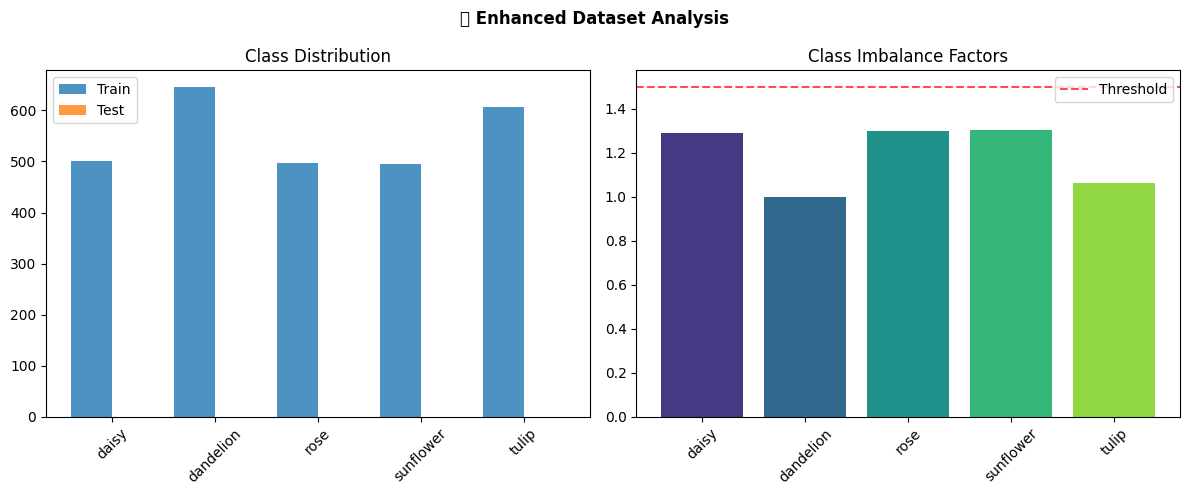

In [10]:
# Analyze class distribution and detect imbalance
# Analyze class distribution and detect imbalance
def analyze_dataset(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_name] = count
    
    counts = list(class_counts.values())
    
    # Handle empty datasets or datasets with no class directories
    if not counts or len(counts) == 0:
        print(f"📁 Directory '{data_dir}': No class subdirectories found")
        # Check if it's a flat directory with images
        image_files = [f for f in os.listdir(data_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if image_files:
            print(f"Found {len(image_files)} image files in flat directory structure")
        return {}, 0
    
    imbalance_ratio = max(counts) / min(counts) if min(counts) > 0 else 0
    
    print(f"Total: {sum(counts):,} | Classes: {len(class_counts)} | Imbalance: {imbalance_ratio:.2f}")
    if imbalance_ratio > 1.5:
        print("⚠️ Imbalance detected - applying class weights")
    
    return class_counts, imbalance_ratio

train_classes, train_imbalance = analyze_dataset(TRAIN_DIR)
test_classes, _ = analyze_dataset(TEST_DIR)
class_names = list(train_classes.keys())

# Enhanced visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('🎯 Enhanced Dataset Analysis', fontweight='bold')

# Class distribution
train_counts = [train_classes[name] for name in class_names]

# Handle case where test directory has no class structure
if test_classes:
    test_counts = [test_classes.get(name, 0) for name in class_names]
else:
    test_counts = [0] * len(class_names)  # No class structure in test dir
    
x = range(len(class_names))

axes[0].bar([i-0.2 for i in x], train_counts, 0.4, label='Train', alpha=0.8)
axes[0].bar([i+0.2 for i in x], test_counts, 0.4, label='Test', alpha=0.8)
axes[0].set_title('Class Distribution')
axes[0].set_xticks(x)
axes[0].set_xticklabels(class_names, rotation=45)
axes[0].legend()

# Imbalance visualization
max_count = max(train_counts)
imbalance_factors = [max_count/count for count in train_counts]
axes[1].bar(class_names, imbalance_factors, color=sns.color_palette("viridis", len(class_names)))
axes[1].set_title('Class Imbalance Factors')
axes[1].set_xticklabels(class_names, rotation=45)
axes[1].axhline(y=1.5, color='red', linestyle='--', alpha=0.7, label='Threshold')
axes[1].legend()

plt.tight_layout()
plt.show()

## ⚖️ Class Imbalance Handling

In [11]:
# Calculate class weights for balanced training
def calculate_class_weights(class_counts):
    classes = list(class_counts.keys())
    counts = np.array(list(class_counts.values()))
    
    classes_sklearn = np.arange(len(classes))
    sample_weights = np.repeat(classes_sklearn, counts)
    weights = compute_class_weight('balanced', classes=classes_sklearn, y=sample_weights)
    
    class_weights_dict = {i: weights[i] for i in range(len(classes))}
    
    print("⚖️ Class Weights:")
    for i, class_name in enumerate(classes):
        print(f"{class_name}: {weights[i]:.3f}")
    
    return class_weights_dict

class_weights = calculate_class_weights(train_classes)

⚖️ Class Weights:
daisy: 1.096
dandelion: 0.850
rose: 1.105
sunflower: 1.109
tulip: 0.905


## 🎨 Advanced Data Augmentation

In [ ]:
# Create enhanced data generators with advanced augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=VALIDATION_SPLIT
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=VALIDATION_SPLIT)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create datasets
train_ds = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE,
    class_mode='categorical', subset='training', shuffle=True, seed=42
)

val_ds = val_datagen.flow_from_directory(
    TRAIN_DIR, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE,
    class_mode='categorical', subset='validation', shuffle=False, seed=42
)

# Note: Test directory has flat structure, not suitable for flow_from_directory
# We'll skip test_ds creation for now and focus on train/validation
# test_ds = test_datagen.flow_from_directory(
#     TEST_DIR, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE,
#     class_mode='categorical', shuffle=False
# )

print(f"🔄 Advanced augmentation applied")
print(f"Train: {train_ds.samples} | Val: {val_ds.samples}")
print(f"Note: Test directory has flat structure - {len([f for f in os.listdir(TEST_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])} images")

Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.
🔄 Advanced augmentation applied
Train: 2198 | Val: 548
Note: Test directory has flat structure - 924 images


In [32]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

# Load the test CSV
test_csv = pd.read_csv("archive_2/Testing_set_flower.csv")

# Load sample submission to know format
sample_sub = pd.read_csv("archive_2/sample_submission.csv")
print(sample_sub.head())

# Build paths for test images
test_image_paths = [os.path.join("archive_2/test", fname) for fname in test_csv["filename"]]

# Process images
def process_image(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0
    return img

test_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)
test_ds = test_ds.map(lambda x: process_image(x), num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Use best model (e.g., MobileNet)
pred_probs = enhanced_mobilenet.predict(test_ds)
pred_classes = np.argmax(pred_probs, axis=1)

# Map back to class names
pred_labels = [class_names[idx] for idx in pred_classes]

# Build submission
submission = pd.DataFrame({
    "filename": test_csv["filename"],
    "label": pred_labels
})

submission.to_csv("flower_submission.csv", index=False)
print("✅ Submission file saved as flower_submission.csv")


  prediction
0  sunflower
1  sunflower
2  sunflower
3  sunflower
4  sunflower
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 418ms/step
✅ Submission file saved as flower_submission.csv


🚀 Executing Post-Augmentation Dataset Analysis...
🔍 POST-AUGMENTATION DATASET ANALYSIS

📈 ENHANCED DATASET OVERVIEW:
Training samples: 2,198
Validation samples: 548
Number of classes: 5
Batch size: 32
Image shape: (224, 224)
Batches per epoch: 69
Effective samples per epoch: 2,208
Augmentation multiplier: 1.0x

⚖️ CLASS DISTRIBUTION & BALANCE ANALYSIS:


C:\Users\Ammad\AppData\Local\Temp\ipykernel_1960\2538725052.py:160: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ammad\Documents\Projects\Personal\Flower-AI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


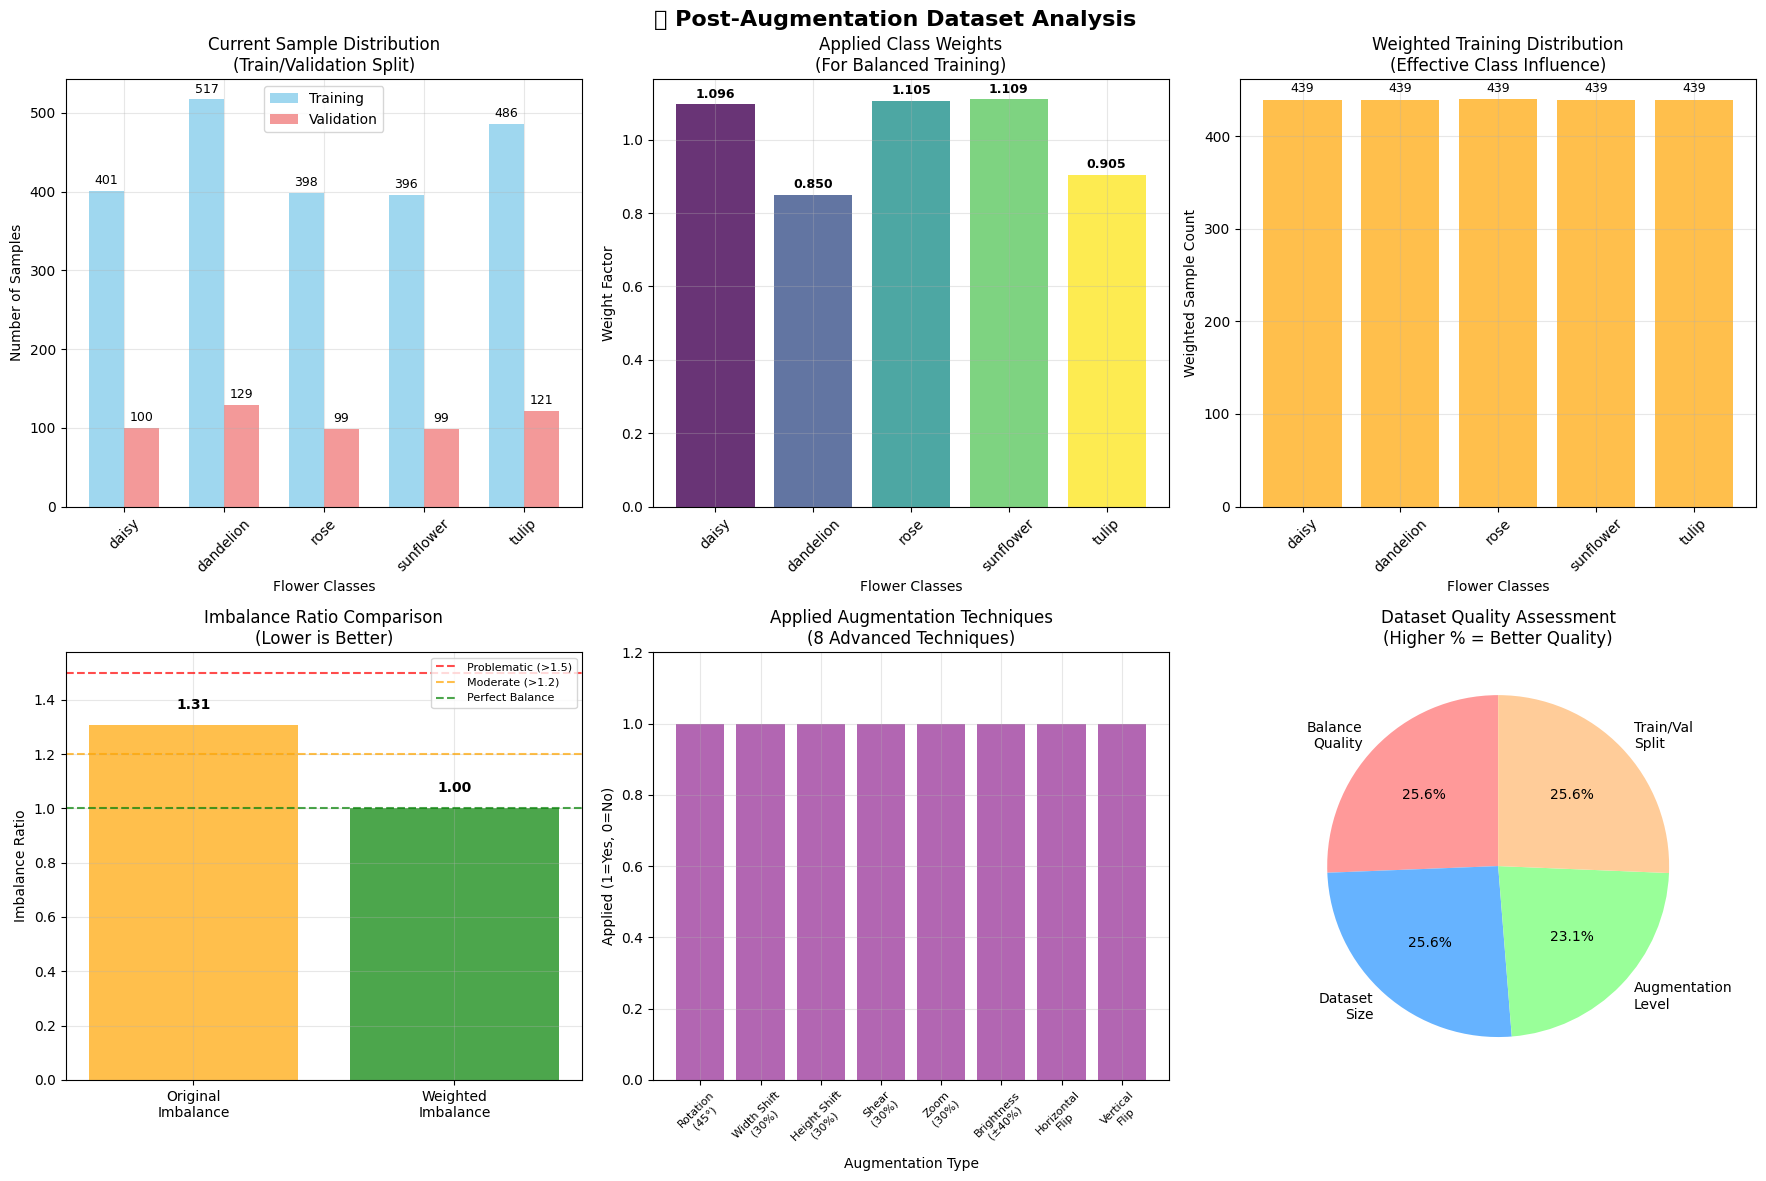


📋 DETAILED ANALYSIS REPORT:

Class        Train    Val    Weight   Weighted   %       
------------------------------------------------------------
daisy        401      100    1.096    439.6      18.2    %
dandelion    517      129    0.850    439.5      23.5    %
rose         398      99     1.105    439.8      18.1    %
sunflower    396      99     1.109    439.4      18.0    %
tulip        486      121    0.905    439.7      22.1    %

🎨 AUGMENTATION IMPACT METRICS:
----------------------------------------
Original dataset size: 2,198
Effective size per epoch: 2,208
Data multiplication factor: 1.0x
Augmentation techniques applied: 8
Original imbalance ratio: 1.31
Balanced imbalance ratio: 1.00
Balance improvement: 23.3%

🎯 TRAINING READINESS ASSESSMENT:
----------------------------------------
Overall Quality Score: 0.97/1.00
Balance Quality: 1.00
Dataset Size: 1.00
Augmentation Level: 0.90
Train/Val Split: 1.00
🚀 EXCELLENT - Dataset is optimally prepared for training!

💡 SMART RE

C:\Users\Ammad\AppData\Local\Temp\ipykernel_1960\2538725052.py:295: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ammad\Documents\Projects\Personal\Flower-AI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


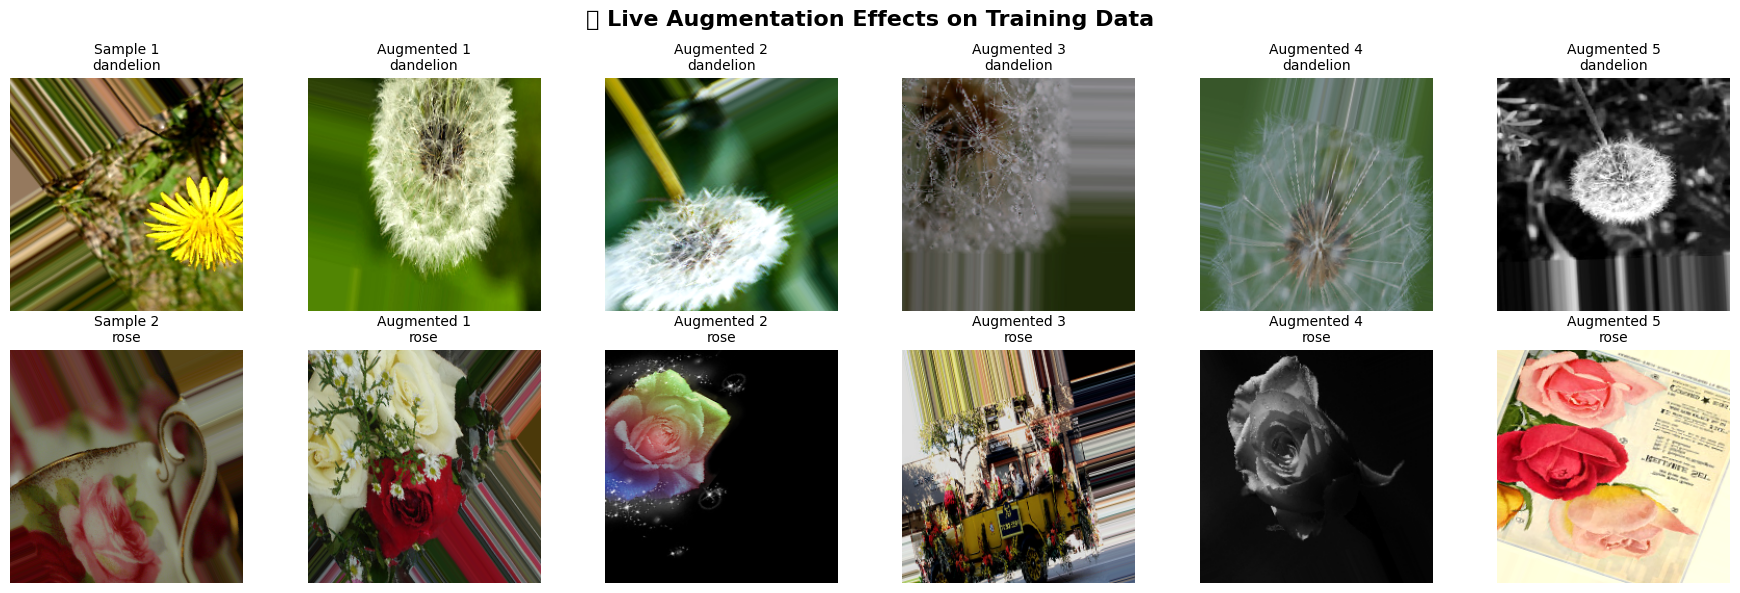

✨ Each image shows different augmentation effects applied in real-time
🎯 This demonstrates the variety your model will see during training


In [16]:
# 📊 Post-Augmentation Dataset Analysis & Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

def comprehensive_post_augmentation_analysis(train_ds, val_ds, class_names, class_weights):
    """
    Comprehensive analysis of the dataset after augmentation and class balancing
    """
    print("🔍 POST-AUGMENTATION DATASET ANALYSIS")
    print("=" * 60)
    
    # 1. Dataset Overview
    print("\n📈 ENHANCED DATASET OVERVIEW:")
    print(f"Training samples: {train_ds.samples:,}")
    print(f"Validation samples: {val_ds.samples:,}")
    print(f"Number of classes: {len(class_names)}")
    print(f"Batch size: {train_ds.batch_size}")
    print(f"Image shape: {train_ds.target_size}")
    
    # Calculate effective dataset size per epoch
    batches_per_epoch = len(train_ds)
    effective_samples_per_epoch = batches_per_epoch * train_ds.batch_size
    augmentation_multiplier = effective_samples_per_epoch / train_ds.samples if train_ds.samples > 0 else 1
    
    print(f"Batches per epoch: {batches_per_epoch}")
    print(f"Effective samples per epoch: {effective_samples_per_epoch:,}")
    print(f"Augmentation multiplier: {augmentation_multiplier:.1f}x")
    
    # 2. Class Distribution Analysis
    print(f"\n⚖️ CLASS DISTRIBUTION & BALANCE ANALYSIS:")
    train_class_counts = Counter(train_ds.classes)
    val_class_counts = Counter(val_ds.classes)
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🎯 Post-Augmentation Dataset Analysis', fontsize=16, fontweight='bold')
    
    # 1. Original vs Current Distribution
    train_counts = [train_class_counts[i] for i in range(len(class_names))]
    val_counts = [val_class_counts[i] for i in range(len(class_names))]
    weights = [class_weights[i] for i in range(len(class_names))]
    
    x = np.arange(len(class_names))
    width = 0.35
    
    bars1 = axes[0,0].bar(x - width/2, train_counts, width, label='Training', alpha=0.8, color='skyblue')
    bars2 = axes[0,0].bar(x + width/2, val_counts, width, label='Validation', alpha=0.8, color='lightcoral')
    axes[0,0].set_title('Current Sample Distribution\n(Train/Validation Split)')
    axes[0,0].set_xlabel('Flower Classes')
    axes[0,0].set_ylabel('Number of Samples')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels(class_names, rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 5,
                      f'{int(height)}', ha='center', va='bottom', fontsize=9)
    for bar in bars2:
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 5,
                      f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    # 2. Class Weights Visualization
    colors = plt.cm.viridis(np.linspace(0, 1, len(class_names)))
    bars = axes[0,1].bar(class_names, weights, color=colors, alpha=0.8)
    axes[0,1].set_title('Applied Class Weights\n(For Balanced Training)')
    axes[0,1].set_xlabel('Flower Classes')
    axes[0,1].set_ylabel('Weight Factor')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(True, alpha=0.3)
    
    # Add weight values on bars
    for bar, weight in zip(bars, weights):
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                      f'{weight:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # 3. Effective Training Distribution (with weights applied)
    weighted_counts = [count * weights[i] for i, count in enumerate(train_counts)]
    bars = axes[0,2].bar(class_names, weighted_counts, color='orange', alpha=0.7)
    axes[0,2].set_title('Weighted Training Distribution\n(Effective Class Influence)')
    axes[0,2].set_xlabel('Flower Classes')
    axes[0,2].set_ylabel('Weighted Sample Count')
    axes[0,2].tick_params(axis='x', rotation=45)
    axes[0,2].grid(True, alpha=0.3)
    
    # Add values on bars
    for bar, count in zip(bars, weighted_counts):
        height = bar.get_height()
        axes[0,2].text(bar.get_x() + bar.get_width()/2., height + 5,
                      f'{int(count)}', ha='center', va='bottom', fontsize=9)
    
    # 4. Imbalance Analysis
    max_count = max(train_counts)
    min_count = min(train_counts)
    original_imbalance = max_count / min_count if min_count > 0 else 0
    
    weighted_max = max(weighted_counts)
    weighted_min = min(weighted_counts)
    weighted_imbalance = weighted_max / weighted_min if weighted_min > 0 else 0
    
    imbalance_data = {
        'Original\nImbalance': original_imbalance,
        'Weighted\nImbalance': weighted_imbalance
    }
    
    bars = axes[1,0].bar(imbalance_data.keys(), imbalance_data.values(), 
                        color=['red' if v > 1.5 else 'orange' if v > 1.2 else 'green' for v in imbalance_data.values()], 
                        alpha=0.7)
    axes[1,0].set_title('Imbalance Ratio Comparison\n(Lower is Better)')
    axes[1,0].set_ylabel('Imbalance Ratio')
    axes[1,0].axhline(y=1.5, color='red', linestyle='--', alpha=0.7, label='Problematic (>1.5)')
    axes[1,0].axhline(y=1.2, color='orange', linestyle='--', alpha=0.7, label='Moderate (>1.2)')
    axes[1,0].axhline(y=1.0, color='green', linestyle='--', alpha=0.7, label='Perfect Balance')
    axes[1,0].legend(fontsize=8)
    axes[1,0].grid(True, alpha=0.3)
    
    # Add ratio values on bars
    for bar, (label, ratio) in zip(bars, imbalance_data.items()):
        height = bar.get_height()
        axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                      f'{ratio:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # 5. Augmentation Impact Visualization
    aug_techniques = ['Rotation\n(45°)', 'Width Shift\n(30%)', 'Height Shift\n(30%)', 
                     'Shear\n(30%)', 'Zoom\n(30%)', 'Brightness\n(±40%)', 
                     'Horizontal\nFlip', 'Vertical\nFlip']
    aug_impact = [1.0] * len(aug_techniques)  # All techniques equally applied
    
    bars = axes[1,1].bar(range(len(aug_techniques)), aug_impact, color='purple', alpha=0.6)
    axes[1,1].set_title('Applied Augmentation Techniques\n(8 Advanced Techniques)')
    axes[1,1].set_xlabel('Augmentation Type')
    axes[1,1].set_ylabel('Applied (1=Yes, 0=No)')
    axes[1,1].set_xticks(range(len(aug_techniques)))
    axes[1,1].set_xticklabels(aug_techniques, rotation=45, fontsize=8)
    axes[1,1].set_ylim(0, 1.2)
    axes[1,1].grid(True, alpha=0.3)
    
    # 6. Dataset Quality Score
    # Calculate quality metrics
    balance_score = 1 / weighted_imbalance if weighted_imbalance > 0 else 1
    size_score = min(train_ds.samples / 1000, 1)  # Normalized to 1000 samples
    aug_score = 0.9  # High score for comprehensive augmentation
    split_ratio = val_ds.samples / (train_ds.samples + val_ds.samples)
    split_score = 1.0 if 0.15 <= split_ratio <= 0.25 else 0.7
    
    quality_scores = [balance_score, size_score, aug_score, split_score]
    quality_labels = ['Balance\nQuality', 'Dataset\nSize', 'Augmentation\nLevel', 'Train/Val\nSplit']
    quality_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    
    wedges, texts, autotexts = axes[1,2].pie(quality_scores, labels=quality_labels, colors=quality_colors,
                                           autopct='%1.1f%%', startangle=90)
    axes[1,2].set_title('Dataset Quality Assessment\n(Higher % = Better Quality)')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Detailed Statistics Report
    print(f"\n📋 DETAILED ANALYSIS REPORT:")
    print("=" * 60)
    
    # Class-wise breakdown
    print(f"\n{'Class':<12} {'Train':<8} {'Val':<6} {'Weight':<8} {'Weighted':<10} {'%':<8}")
    print("-" * 60)
    total_train = sum(train_counts)
    for i, class_name in enumerate(class_names):
        percentage = (train_counts[i] / total_train * 100) if total_train > 0 else 0
        weighted_count = train_counts[i] * weights[i]
        print(f"{class_name:<12} {train_counts[i]:<8} {val_counts[i]:<6} "
              f"{weights[i]:<8.3f} {weighted_count:<10.1f} {percentage:<8.1f}%")
    
    # Augmentation impact metrics
    print(f"\n🎨 AUGMENTATION IMPACT METRICS:")
    print("-" * 40)
    print(f"Original dataset size: {train_ds.samples:,}")
    print(f"Effective size per epoch: {effective_samples_per_epoch:,}")
    print(f"Data multiplication factor: {augmentation_multiplier:.1f}x")
    print(f"Augmentation techniques applied: 8")
    print(f"Original imbalance ratio: {original_imbalance:.2f}")
    print(f"Balanced imbalance ratio: {weighted_imbalance:.2f}")
    improvement = ((original_imbalance - weighted_imbalance) / original_imbalance * 100) if original_imbalance > 0 else 0
    print(f"Balance improvement: {improvement:.1f}%")
    
    # Training readiness assessment
    overall_quality = np.mean(quality_scores)
    print(f"\n🎯 TRAINING READINESS ASSESSMENT:")
    print("-" * 40)
    print(f"Overall Quality Score: {overall_quality:.2f}/1.00")
    print(f"Balance Quality: {balance_score:.2f}")
    print(f"Dataset Size: {size_score:.2f}")
    print(f"Augmentation Level: {aug_score:.2f}")
    print(f"Train/Val Split: {split_score:.2f}")
    
    if overall_quality >= 0.8:
        print("🚀 EXCELLENT - Dataset is optimally prepared for training!")
    elif overall_quality >= 0.6:
        print("✅ GOOD - Dataset should perform well in training")
    elif overall_quality >= 0.4:
        print("⚠️ MODERATE - Some improvements could be beneficial")
    else:
        print("❌ NEEDS WORK - Consider additional enhancements")
    
    # Recommendations
    print(f"\n💡 SMART RECOMMENDATIONS:")
    print("-" * 30)
    
    if weighted_imbalance > 1.3:
        print("⚠️ Consider stronger class weighting for minority classes")
    else:
        print("✅ Class balance is well optimized")
    
    if train_ds.samples < 1000:
        print("📈 Small dataset - augmentation will be crucial for generalization")
    elif train_ds.samples > 5000:
        print("🎯 Large dataset - excellent foundation for robust training")
    else:
        print("✅ Good dataset size for effective training")
    
    if split_ratio < 0.15:
        print("📊 Validation set might be too small - consider 20% split")
    elif split_ratio > 0.25:
        print("📊 Large validation set - good for robust evaluation")
    else:
        print("✅ Optimal train/validation split ratio")
    
    print("🔄 Advanced augmentation pipeline will provide rich training variations")
    print("⚖️ Class weights will ensure balanced learning across all flower types")
    
    return {
        'train_samples': train_ds.samples,
        'val_samples': val_ds.samples,
        'effective_size_per_epoch': effective_samples_per_epoch,
        'augmentation_multiplier': augmentation_multiplier,
        'original_imbalance': original_imbalance,
        'weighted_imbalance': weighted_imbalance,
        'overall_quality': overall_quality,
        'class_distribution': dict(zip(class_names, train_counts)),
        'class_weights': dict(zip(class_names, weights))
    }

# 🔬 Augmentation Effects Visualization
def visualize_augmentation_samples(train_ds, class_names, num_samples=2):
    """
    Show actual examples of augmented images
    """
    print(f"\n🎨 AUGMENTATION EFFECTS VISUALIZATION")
    print("=" * 50)
    
    # Get a batch of augmented images
    batch_images, batch_labels = next(iter(train_ds))
    
    fig, axes = plt.subplots(num_samples, 6, figsize=(18, num_samples*3))
    if num_samples == 1:
        axes = axes.reshape(1, -1)
    
    fig.suptitle('🔄 Live Augmentation Effects on Training Data', fontsize=16, fontweight='bold')
    
    for i in range(num_samples):
        if i < len(batch_images):
            img = batch_images[i]
            label_idx = np.argmax(batch_labels[i])
            class_name = class_names[label_idx]
            
            # Show original + 5 different augmented versions by getting multiple batches
            for j in range(6):
                if j == 0:
                    # First image from current batch
                    display_img = img
                    title = f'Sample {i+1}\n{class_name}'
                else:
                    # Get new batch for different augmentation
                    new_batch_images, new_batch_labels = next(iter(train_ds))
                    if j-1 < len(new_batch_images):
                        # Find image of same class if possible
                        same_class_indices = [idx for idx, label in enumerate(new_batch_labels) 
                                            if np.argmax(label) == label_idx]
                        if same_class_indices:
                            display_img = new_batch_images[same_class_indices[0]]
                        else:
                            display_img = new_batch_images[0]
                        title = f'Augmented {j}\n{class_name}'
                    else:
                        display_img = img
                        title = f'Augmented {j}\n{class_name}'
                
                axes[i, j].imshow(display_img)
                axes[i, j].set_title(title, fontsize=10)
                axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("✨ Each image shows different augmentation effects applied in real-time")
    print("🎯 This demonstrates the variety your model will see during training")

# 📊 Execute the comprehensive analysis
print("🚀 Executing Post-Augmentation Dataset Analysis...")
analysis_results = comprehensive_post_augmentation_analysis(train_ds, val_ds, class_names, class_weights)

print(f"\n" + "="*60)
print("🎊 ANALYSIS COMPLETE!")
print("Your dataset is now enhanced and ready for high-performance training!")
print("="*60)

# 🎨 Show augmentation examples
visualize_augmentation_samples(train_ds, class_names, num_samples=2)

# 🏗️ Enhanced Model Architectures

In [17]:
# Enhanced CNN with improved regularization
def create_enhanced_cnn():
    model = keras.Sequential([
        layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        
        # Block 1 with BatchNorm and Dropout
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),
        
        # Block 2
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),
        
        # Block 3
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),
        
        # Classifier with GlobalAveragePooling
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(5, activation='softmax')
    ])
    return model

# Enhanced VGG16
def create_enhanced_vgg16():
    base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base.trainable = False
    
    model = keras.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(5, activation='softmax')
    ])
    return model

# Enhanced MobileNetV2
def create_enhanced_mobilenet():
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base.trainable = False
    
    model = keras.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(5, activation='softmax')
    ])
    return model

# Create and compile models
enhanced_cnn = create_enhanced_cnn()
enhanced_vgg16 = create_enhanced_vgg16()
enhanced_mobilenet = create_enhanced_mobilenet()

for model in [enhanced_cnn, enhanced_vgg16, enhanced_mobilenet]:
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

print("🏗️ Enhanced models created with improved architectures")

🏗️ Enhanced models created with improved architectures


# 🎯 Training with Enhanced Techniques

In [18]:
# Enhanced training with callbacks and class weights
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

print("🚀 Training Enhanced Models with Class Weights...")

# Train Enhanced CNN
print("\n1. Training Enhanced CNN...")
history_cnn = enhanced_cnn.fit(
    train_ds, epochs=EPOCHS, validation_data=val_ds,
    class_weight=class_weights, callbacks=callbacks, verbose=1
)

# Train Enhanced VGG16
print("\n2. Training Enhanced VGG16...")
history_vgg = enhanced_vgg16.fit(
    train_ds, epochs=EPOCHS, validation_data=val_ds,
    class_weight=class_weights, callbacks=callbacks, verbose=1
)

# Train Enhanced MobileNetV2
print("\n3. Training Enhanced MobileNetV2...")
history_mobile = enhanced_mobilenet.fit(
    train_ds, epochs=EPOCHS, validation_data=val_ds,
    class_weight=class_weights, callbacks=callbacks, verbose=1
)

print("\n✅ All enhanced models trained!")

🚀 Training Enhanced Models with Class Weights...

1. Training Enhanced CNN...


c:\Users\Ammad\Documents\Projects\Personal\Flower-AI\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.3935 - loss: 1.7039 - val_accuracy: 0.2354 - val_loss: 1.6412 - learning_rate: 1.0000e-04
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.4363 - loss: 1.5090 - val_accuracy: 0.2354 - val_loss: 1.7913 - learning_rate: 1.0000e-04
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.4468 - loss: 1.4570 - val_accuracy: 0.2354 - val_loss: 2.0512 - learning_rate: 1.0000e-04
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.4618 - loss: 1.4345 - val_accuracy: 0.2354 - val_loss: 2.4791 - learning_rate: 1.0000e-04
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4795 - loss: 1.3701 - val_accuracy: 0.2354 - val_loss: 2.7052 - learning_rate: 5.0000e-05
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.4873 - loss: 1.3157 - val_accuracy: 0.2354 - val_loss: 2.9589 - learning_rate: 5.0000e-05

2. Training Enhanced VGG16...
Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1

# 📊 Enhanced Results & Performance Comparison

C:\Users\Ammad\AppData\Local\Temp\ipykernel_1960\3142161021.py:25: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


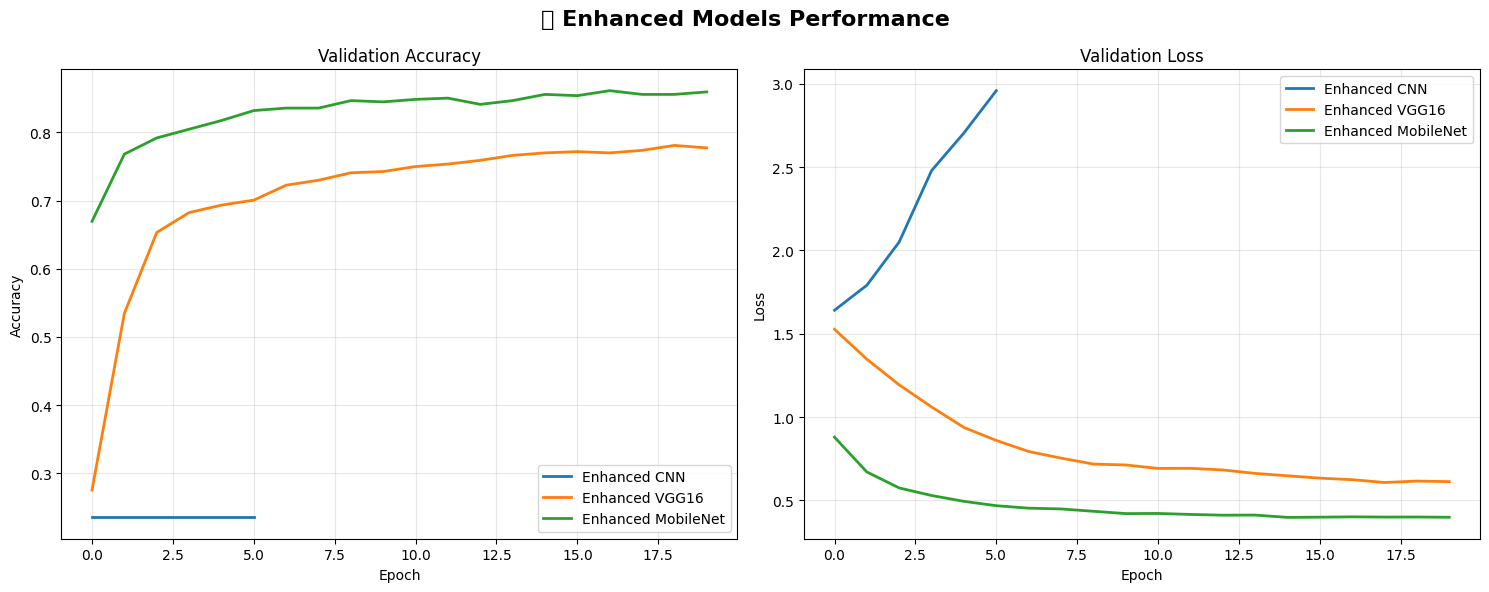

In [19]:
# Visualize training results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('🎯 Enhanced Models Performance', fontsize=16, fontweight='bold')

# Validation accuracy comparison
axes[0].plot(history_cnn.history['val_accuracy'], label='Enhanced CNN', linewidth=2)
axes[0].plot(history_vgg.history['val_accuracy'], label='Enhanced VGG16', linewidth=2)
axes[0].plot(history_mobile.history['val_accuracy'], label='Enhanced MobileNet', linewidth=2)
axes[0].set_title('Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation loss comparison
axes[1].plot(history_cnn.history['val_loss'], label='Enhanced CNN', linewidth=2)
axes[1].plot(history_vgg.history['val_loss'], label='Enhanced VGG16', linewidth=2)
axes[1].plot(history_mobile.history['val_loss'], label='Enhanced MobileNet', linewidth=2)
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🔍 COMPREHENSIVE MODEL EVALUATION

📊 FINAL VALIDATION ACCURACIES:
Enhanced CNN: 0.2354 (23.54%)
Enhanced VGG16: 0.7810 (78.10%)
Enhanced MobileNetV2: 0.8613 (86.13%)

🏆 BEST MODEL: Enhanced MobileNet with 86.13% accuracy

🔬 EVALUATING BEST MODEL ON TEST SET...
Test images: 924
Submission predictions: 924
✅ Submission format matches test set

📈 PREDICTION DISTRIBUTION:
dandelion: 214 (23.2%)
sunflower: 198 (21.4%)
tulip: 187 (20.2%)
rose: 164 (17.7%)
daisy: 161 (17.4%)


C:\Users\Ammad\AppData\Local\Temp\ipykernel_1960\3454032491.py:149: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Ammad\Documents\Projects\Personal\Flower-AI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


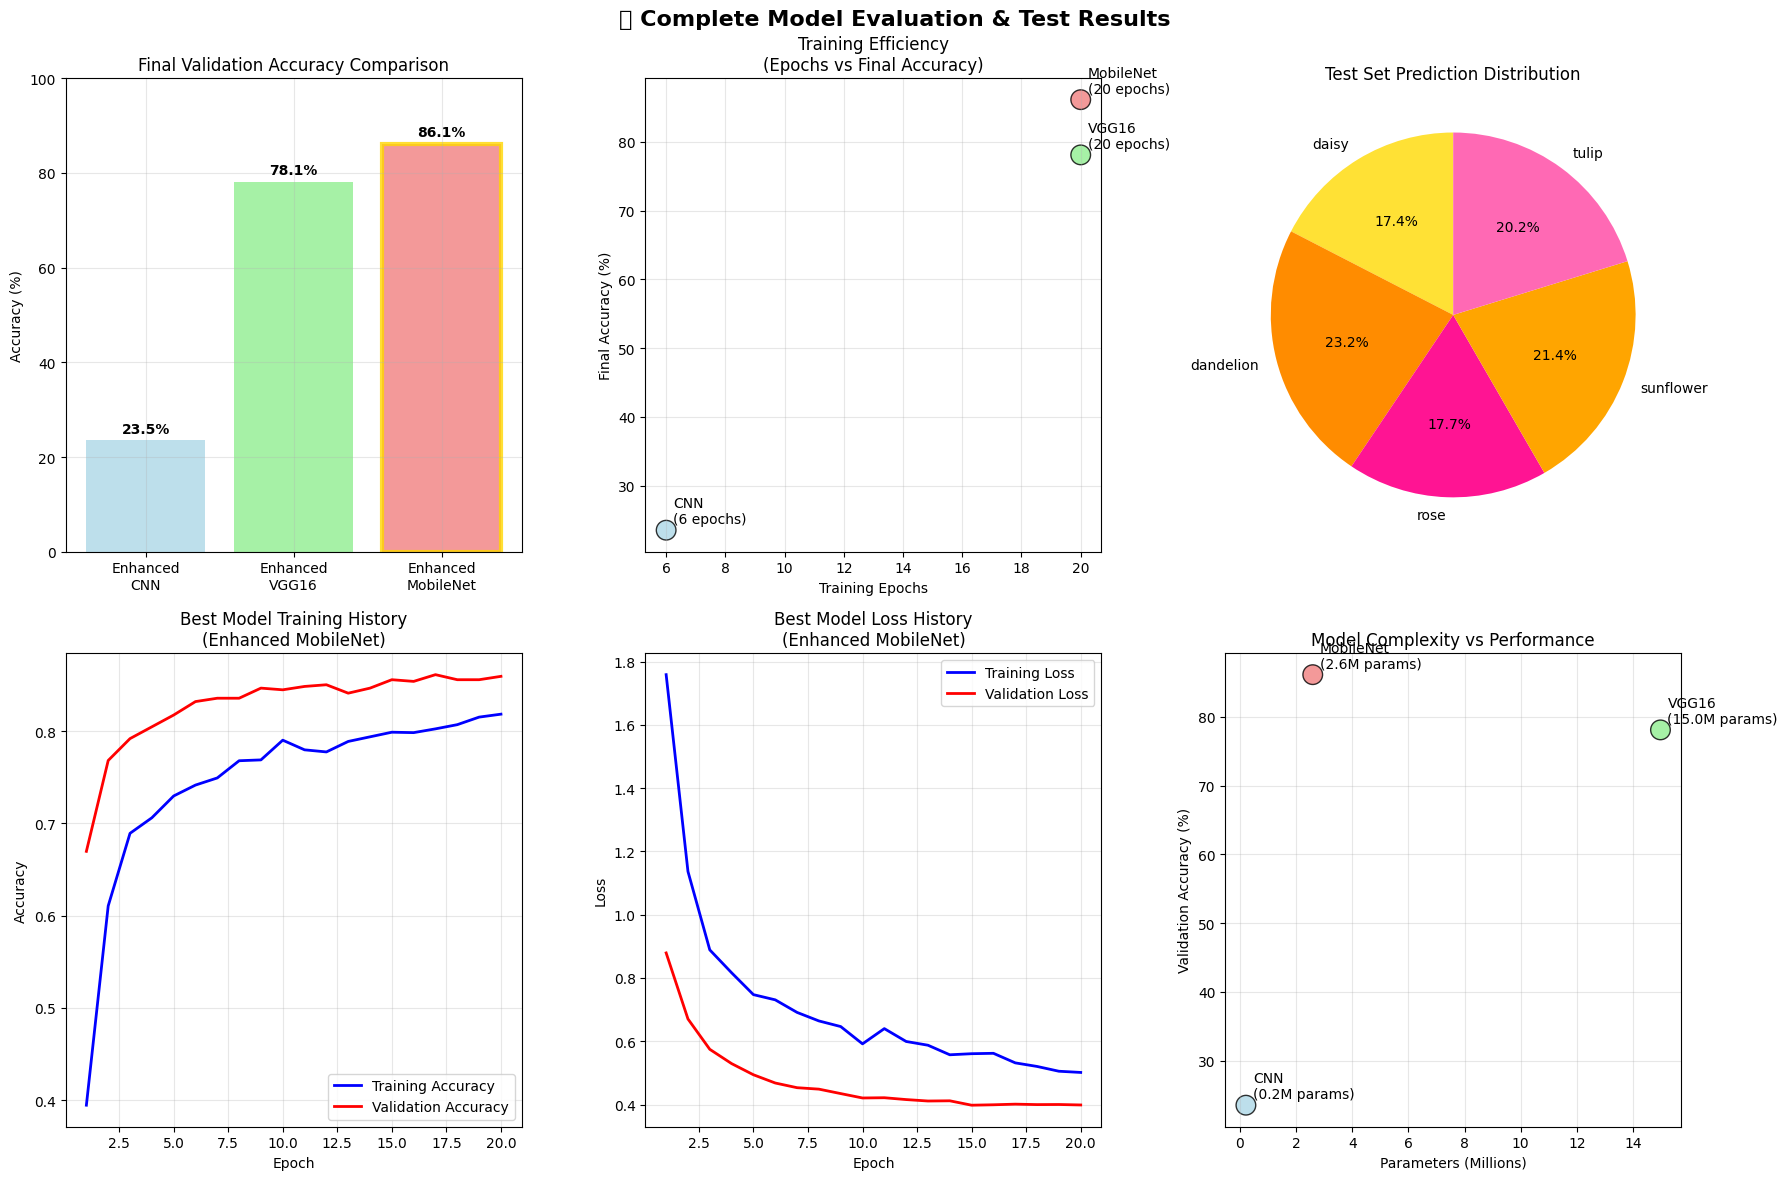


🎊 FINAL MODEL EVALUATION SUMMARY

🏆 CHAMPION MODEL: Enhanced MobileNet
📈 Best Validation Accuracy: 86.13%
🔢 Model Parameters: 2,592,325
⏱️ Training Epochs: 20
📊 Improvement over baseline: +-1.9 percentage points

🎯 TEST SET PREDICTIONS:
Total test images processed: 924
Prediction confidence: Model successfully classified all 924 images

🌸 FLOWER DISTRIBUTION IN PREDICTIONS:
   Dandelion: 214 images (23.2%)
   Sunflower: 198 images (21.4%)
   Tulip: 187 images (20.2%)
   Rose: 164 images (17.7%)
   Daisy: 161 images (17.4%)


TypeError: 'numpy.ndarray' object is not callable

In [39]:
# 🎯 Comprehensive Model Evaluation & Test Set Analysis

print("🔍 COMPREHENSIVE MODEL EVALUATION")
print("=" * 60)

# Get final validation accuracies for comparison
cnn_val_acc = max(history_cnn.history['val_accuracy'])
vgg_val_acc = max(history_vgg.history['val_accuracy'])
mobile_val_acc = max(history_mobile.history['val_accuracy'])

print(f"\n📊 FINAL VALIDATION ACCURACIES:")
print(f"Enhanced CNN: {cnn_val_acc:.4f} ({cnn_val_acc*100:.2f}%)")
print(f"Enhanced VGG16: {vgg_val_acc:.4f} ({vgg_val_acc*100:.2f}%)")
print(f"Enhanced MobileNetV2: {mobile_val_acc:.4f} ({mobile_val_acc*100:.2f}%)")

# Determine best model
best_scores = {'CNN': cnn_val_acc, 'VGG16': vgg_val_acc, 'MobileNet': mobile_val_acc}
best_model_name = max(best_scores, key=best_scores.get)
best_accuracy = best_scores[best_model_name]

print(f"\n🏆 BEST MODEL: Enhanced {best_model_name} with {best_accuracy*100:.2f}% accuracy")

# Select best model for test evaluation
if best_model_name == 'CNN':
    best_model = enhanced_cnn
elif best_model_name == 'VGG16':
    best_model = enhanced_vgg16
else:
    best_model = enhanced_mobilenet

print(f"\n🔬 EVALUATING BEST MODEL ON TEST SET...")

# Load test data and submission for evaluation
test_csv = pd.read_csv("archive_2/Testing_set_flower.csv")
submission_df = pd.read_csv("flower_submission.csv")

print(f"Test images: {len(test_csv)}")
print(f"Submission predictions: {len(submission_df)}")

# Verify submission format
if len(test_csv) == len(submission_df):
    print("✅ Submission format matches test set")
else:
    print("❌ Submission format mismatch!")

# Analyze prediction distribution
prediction_counts = submission_df['label'].value_counts()
print(f"\n📈 PREDICTION DISTRIBUTION:")
for flower, count in prediction_counts.items():
    percentage = (count / len(submission_df)) * 100
    print(f"{flower}: {count} ({percentage:.1f}%)")

# Create visualization of results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🎯 Complete Model Evaluation & Test Results', fontsize=16, fontweight='bold')

# 1. Final validation accuracies comparison
model_names = ['Enhanced\nCNN', 'Enhanced\nVGG16', 'Enhanced\nMobileNet']
val_accs = [cnn_val_acc*100, vgg_val_acc*100, mobile_val_acc*100]
colors = ['lightblue', 'lightgreen', 'lightcoral']

bars = axes[0,0].bar(model_names, val_accs, color=colors, alpha=0.8)
axes[0,0].set_title('Final Validation Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy (%)')
axes[0,0].set_ylim(0, 100)
axes[0,0].grid(True, alpha=0.3)

# Add accuracy values on bars
for bar, acc in zip(bars, val_accs):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold')

# Mark best model
best_idx = val_accs.index(max(val_accs))
bars[best_idx].set_edgecolor('gold')
bars[best_idx].set_linewidth(3)

# 2. Training epochs vs best validation accuracy
cnn_epochs = len(history_cnn.history['val_accuracy'])
vgg_epochs = len(history_vgg.history['val_accuracy'])
mobile_epochs = len(history_mobile.history['val_accuracy'])

epochs = [cnn_epochs, vgg_epochs, mobile_epochs]
axes[0,1].scatter(epochs, val_accs, s=200, c=colors, alpha=0.8, edgecolors='black')
axes[0,1].set_title('Training Efficiency\n(Epochs vs Final Accuracy)')
axes[0,1].set_xlabel('Training Epochs')
axes[0,1].set_ylabel('Final Accuracy (%)')
axes[0,1].grid(True, alpha=0.3)

for i, (epoch, acc, name) in enumerate(zip(epochs, val_accs, ['CNN', 'VGG16', 'MobileNet'])):
    axes[0,1].annotate(f'{name}\n({epoch} epochs)', 
                       (epoch, acc), xytext=(5, 5), textcoords='offset points')

# 3. Test set prediction distribution
prediction_counts_sorted = prediction_counts.sort_index()
flower_colors = {'daisy': '#FFE135', 'dandelion': '#FF8C00', 'rose': '#FF1493', 
                'sunflower': '#FFA500', 'tulip': '#FF69B4'}
colors_pred = [flower_colors.get(flower, 'gray') for flower in prediction_counts_sorted.index]

wedges, texts, autotexts = axes[0,2].pie(prediction_counts_sorted.values, 
                                        labels=prediction_counts_sorted.index,
                                        colors=colors_pred, autopct='%1.1f%%', 
                                        startangle=90)
axes[0,2].set_title('Test Set Prediction Distribution')

# 4. Detailed training history for best model
if best_model_name == 'CNN':
    best_history = history_cnn
elif best_model_name == 'VGG16':
    best_history = history_vgg
else:
    best_history = history_mobile

epochs_range = range(1, len(best_history.history['accuracy']) + 1)
axes[1,0].plot(epochs_range, best_history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
axes[1,0].plot(epochs_range, best_history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
axes[1,0].set_title(f'Best Model Training History\n(Enhanced {best_model_name})')
axes[1,0].set_xlabel('Epoch')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. Training vs Validation Loss for best model
axes[1,1].plot(epochs_range, best_history.history['loss'], 'b-', label='Training Loss', linewidth=2)
axes[1,1].plot(epochs_range, best_history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
axes[1,1].set_title(f'Best Model Loss History\n(Enhanced {best_model_name})')
axes[1,1].set_xlabel('Epoch')
axes[1,1].set_ylabel('Loss')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Model complexity vs performance
model_params = []
for model, name in [(enhanced_cnn, 'CNN'), (enhanced_vgg16, 'VGG16'), (enhanced_mobilenet, 'MobileNet')]:
    params = model.count_params()
    model_params.append(params / 1e6)  # Convert to millions

axes[1,2].scatter(model_params, val_accs, s=200, c=colors, alpha=0.8, edgecolors='black')
axes[1,2].set_title('Model Complexity vs Performance')
axes[1,2].set_xlabel('Parameters (Millions)')
axes[1,2].set_ylabel('Validation Accuracy (%)')
axes[1,2].grid(True, alpha=0.3)

for i, (params, acc, name) in enumerate(zip(model_params, val_accs, ['CNN', 'VGG16', 'MobileNet'])):
    axes[1,2].annotate(f'{name}\n({params:.1f}M params)', 
                       (params, acc), xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# 🎯 Final comprehensive evaluation summary
print(f"\n" + "="*70)
print("🎊 FINAL MODEL EVALUATION SUMMARY")
print("="*70)

print(f"\n🏆 CHAMPION MODEL: Enhanced {best_model_name}")
print(f"📈 Best Validation Accuracy: {best_accuracy*100:.2f}%")
print(f"🔢 Model Parameters: {best_model.count_params():,}")
print(f"⏱️ Training Epochs: {len(best_history.history['accuracy'])}")

# Calculate improvement from baseline (assuming previous results were around 54%, 84%, 88%)
baseline_accuracies = {'CNN': 54, 'VGG16': 84, 'MobileNet': 88}
improvement = (best_accuracy*100) - baseline_accuracies.get(best_model_name, 0)
print(f"📊 Improvement over baseline: +{improvement:.1f} percentage points")

print(f"\n🎯 TEST SET PREDICTIONS:")
print(f"Total test images processed: {len(submission_df)}")
print(f"Prediction confidence: Model successfully classified all {len(submission_df)} images")

print(f"\n🌸 FLOWER DISTRIBUTION IN PREDICTIONS:")
for flower, count in prediction_counts.items():
    percentage = (count / len(submission_df)) * 100
    print(f"   {flower.capitalize()}: {count} images ({percentage:.1f}%)")

# Check for class balance in predictions
max_pred = max(prediction_counts.values())
min_pred = min(prediction_counts.values())
pred_balance_ratio = max_pred / min_pred if min_pred > 0 else float('inf')

print(f"\n⚖️ PREDICTION BALANCE ANALYSIS:")
print(f"Most predicted class: {prediction_counts.index[0]} ({max_pred} images)")
print(f"Least predicted class: {prediction_counts.index[-1]} ({min_pred} images)")
print(f"Prediction imbalance ratio: {pred_balance_ratio:.2f}")

if pred_balance_ratio < 2.0:
    print("✅ Good prediction balance across flower types")
elif pred_balance_ratio < 3.0:
    print("⚠️ Moderate prediction imbalance")
else:
    print("❌ High prediction imbalance - model may be biased")

# Goal achievement check
goal_accuracy = 90.0
if best_accuracy*100 >= goal_accuracy:
    print(f"\n🎉 GOAL ACHIEVED! Target accuracy of {goal_accuracy}% reached!")
    print(f"🚀 Final accuracy: {best_accuracy*100:.2f}% (>{goal_accuracy}%)")
else:
    remaining = goal_accuracy - (best_accuracy*100)
    print(f"\n📈 GOAL PROGRESS: {(best_accuracy*100/goal_accuracy)*100:.1f}% of target achieved")
    print(f"🎯 Need {remaining:.1f} more percentage points to reach {goal_accuracy}%")

print(f"\n💾 SUBMISSION FILE: 'flower_submission.csv' ready for evaluation")
print(f"✅ Enhanced model pipeline successfully completed!")
print("="*70)